<a href="https://colab.research.google.com/github/vvshankar78/EVA4-CIFAR-pytorch/blob/master/EVA4_Assign7b_modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
!pip install torchsummary
from torchsummary import summary
%matplotlib inline

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



 frog plane  ship plane


torch.Size([4, 3, 32, 32])

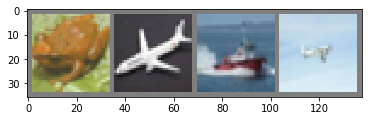

In [3]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

images.shape

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



Depthwise Reference: https://stackoverflow.com/questions/55123161/groups-in-convolutional-neural-network-cnn



In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
my_path = "/content/gdrive/My Drive/EVA-4"
import sys
sys.path.append(my_path)
!ls /content/gdrive/My\ Drive/EVA-4

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
add2.py        __pycache__     vs_class_acc.py	vs_train.py
my_archi_2.py  vs_accuracy.py  vs_net.py


3. Define a Loss function and optimizer

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import vs_net
import vs_train

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = vs_net.Net1().to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,640
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]          18,496
      BatchNorm2d-11           [-1, 64, 16, 16]             128
             ReLU-12           [-1, 64, 16, 16]               0
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14          [-1, 128,

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [8]:
for epoch in range(10):  # loop over the dataset multiple times  
    vs_train.train(net,device,trainloader,optimizer,criterion,epoch)
print('Finished Training')

[1,  2000] loss: 2.015
[1,  4000] loss: 1.855
[1,  6000] loss: 1.740
[1,  8000] loss: 1.640
[1, 10000] loss: 1.570
[1, 12000] loss: 1.482
[2,  2000] loss: 1.367
[2,  4000] loss: 1.333
[2,  6000] loss: 1.290
[2,  8000] loss: 1.240
[2, 10000] loss: 1.219
[2, 12000] loss: 1.170
[3,  2000] loss: 1.098
[3,  4000] loss: 1.069
[3,  6000] loss: 1.066
[3,  8000] loss: 1.052
[3, 10000] loss: 1.027
[3, 12000] loss: 1.008
[4,  2000] loss: 0.934
[4,  4000] loss: 0.955
[4,  6000] loss: 0.931
[4,  8000] loss: 0.926
[4, 10000] loss: 0.903
[4, 12000] loss: 0.907
[5,  2000] loss: 0.826
[5,  4000] loss: 0.836
[5,  6000] loss: 0.845
[5,  8000] loss: 0.832
[5, 10000] loss: 0.835
[5, 12000] loss: 0.809
[6,  2000] loss: 0.773
[6,  4000] loss: 0.774
[6,  6000] loss: 0.738
[6,  8000] loss: 0.757
[6, 10000] loss: 0.769
[6, 12000] loss: 0.758
[7,  2000] loss: 0.706
[7,  4000] loss: 0.695
[7,  6000] loss: 0.703
[7,  8000] loss: 0.705
[7, 10000] loss: 0.702
[7, 12000] loss: 0.700
[8,  2000] loss: 0.656
[8,  4000] 

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane


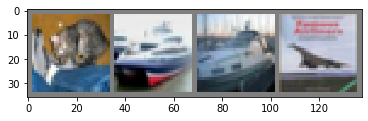

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images).cpu())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [10]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [11]:
import vs_accuracy
vs_accuracy.print_acc(testloader,net,device)

Accuracy of the network on the 10000 test images: 77 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [12]:
import vs_class_acc
vs_class_acc.class_acc(testloader,net,device,classes)

Accuracy of plane : 79 %
Accuracy of   car : 85 %
Accuracy of  bird : 66 %
Accuracy of   cat : 59 %
Accuracy of  deer : 80 %
Accuracy of   dog : 63 %
Accuracy of  frog : 81 %
Accuracy of horse : 82 %
Accuracy of  ship : 89 %
Accuracy of truck : 84 %
